In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn import svm
import warnings
from sklearn.model_selection import validation_curve, learning_curve
from utils import load_grades_data
import time
from sklearn.neighbors import KNeighborsClassifier

## Setup

In [3]:
X, y = load_grades_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

## Model Complexity Curve - C

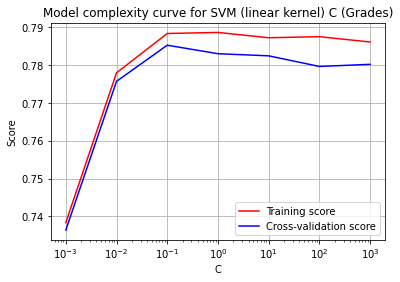

In [4]:


svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


C_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(svm_linear, X_train, y_train, param_name="C", param_range=C_range, cv=5)

plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), label='Training score', color='r')
plt.semilogx(C_range, np.mean(test_scores, axis=1), label='Cross-validation score', color='b')
plt.title('Model complexity curve for SVM (linear kernel) C (Grades)')
plt.xlabel('C')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()


## Hyper Parameter Tuning

In [7]:
Cs = [1e-4, 1e-3, 1e-2, 1e01, 1]
gammas = [1,10,100]
param_grid = {'C': Cs, 'gamma': gammas}

clf = GridSearchCV(estimator = svm.SVC(kernel='linear',random_state=100),
                   param_grid=param_grid, cv=5)
t0 = time.time()
clf.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0
print('Completed training in %f seconds' % train_time)

best_clf_svm = clf
best_params = clf.best_params_
print("Best parameters set found on development set:")
print(best_params)
t0 = time.time()
y_pred = best_clf_svm.predict(X_test)
t1 = time.time()
test_time = t1 - t0
print('Inference time on test data: %f seconds' % test_time)
best_accuracy = accuracy_score(y_test, y_pred)
print('Best accuracy with SVM (linear kernel) is %.2f%%' % (best_accuracy * 100))

Completed training in 5.002645 seconds
Best parameters set found on development set:
{'C': 1, 'gamma': 1}
Inference time on test data: 0.012920 seconds
Best accuracy with SVM (linear kernel) is 77.93%


## Learning Curve

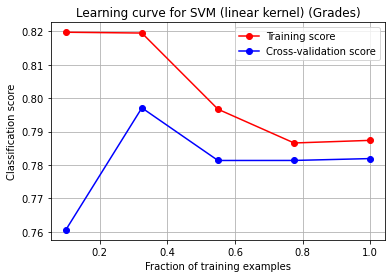

In [8]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'ro-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'bo-', label='Cross-validation score')
plt.title('Learning curve for SVM (linear kernel) (Grades)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()